# TODO
* clean this up

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from uncertainties import unumpy as unp

sns.set_style("white")

In [2]:
with pd.HDFStore(os.path.join(
    "/home",
    "mick",
    "DetResearch",
    "scripts",
    "simulation_measurement_comparison",
    "simulated_and_measured.h5",
), "r") as store:
    df = store.data
    
df

,diluent,phi_nom,dil_mf_nom,p_0,u_p_0,t_0,phi,u_phi,dil_mf,u_dil_mf,wave_speed,u_wave_speed,cell_size_measured,u_cell_size_measured,cell_size_gavrikov,cell_size_ng,cell_size_westbrook
0,CO2,0.4,0.10,101393.842884,2.307000,289.846188,0.419182,0.000208,0.103943,0.000040,1780.064483,1.212763,17.711596,0.480062,770.810052,74.459337,40.577703
1,CO2,0.4,0.15,101400.200470,1.609842,290.021614,0.416662,0.000215,0.154795,0.000036,1742.324854,1.161985,26.122865,0.479481,2328.318780,137.733125,76.176883
2,CO2,0.4,0.20,101383.316513,1.976709,290.005443,0.425508,0.000378,0.207642,0.000063,1680.937965,1.326527,45.265852,0.594380,7173.643295,262.627217,148.643042
3,CO2,0.7,0.10,101393.617108,2.121143,289.767941,0.735369,0.000243,0.104023,0.000045,1944.385714,1.446872,11.744907,0.530100,275.832035,41.773144,24.192077
4,CO2,0.7,0.15,101412.528953,2.179424,289.308769,0.730354,0.000250,0.154600,0.000045,1884.805654,1.665023,14.199823,0.512883,777.986099,72.212132,43.211558
5,CO2,0.7,0.20,101412.244820,1.938748,290.890143,0.739247,0.000282,0.207012,0.000045,1808.159887,1.251217,22.565446,0.478742,2342.272709,127.963220,79.797353
6,CO2,1.0,0.10,101396.288279,2.719599,290.170199,1.048230,0.000235,0.103722,0.000039,2030.771107,1.578345,10.729874,0.408369,213.161962,33.742735,19.590121
7,CO2,1.0,0.15,101404.272743,1.800340,290.141360,1.048723,0.000231,0.154530,0.000037,1965.920228,1.479180,13.662187,0.480046,668.234272,56.702087,34.275813
8,CO2,1.0,0.20,101410.128009,1.557379,290.441929,1.052847,0.000288,0.206571,0.000042,1907.275986,1.392106,18.601504,0.484546,2103.742085,98.650499,62.648736
9,N2,0.4,0.10,101368.606788,2.121188,289.359526,0.416727,0.000224,0.180426,0.000041,1880.070432,1.657319,15.263125,0.601509,275.935516,47.345764,24.757695


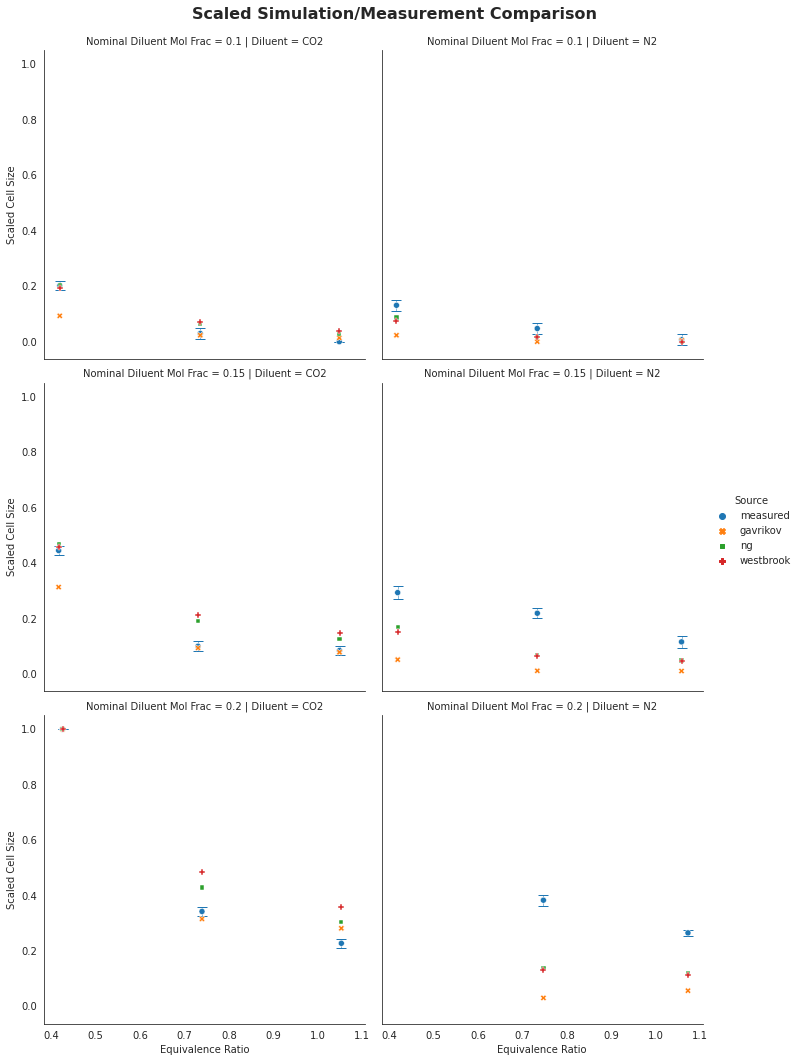

<Figure size 432x288 with 0 Axes>

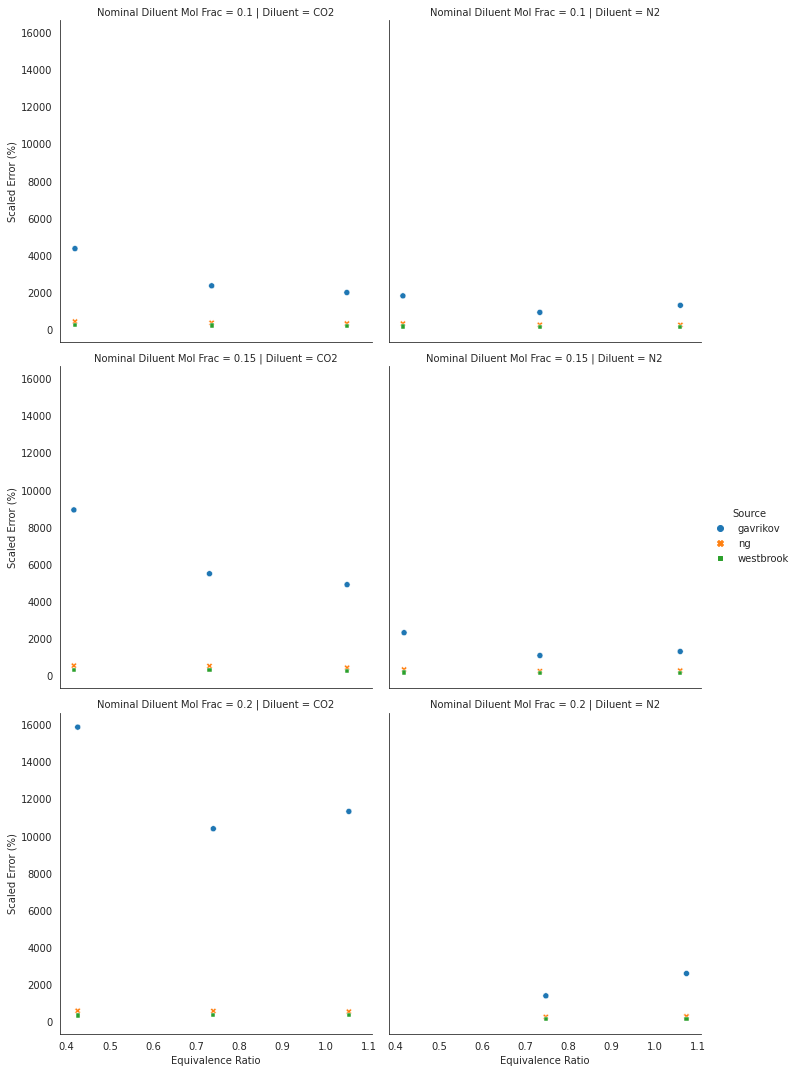

In [3]:
def get_scaled_cell_size(cell_size: np.array):
    cs_min = np.min(cell_size)
    cs_max = np.max(cell_size)
    return (cell_size - cs_min) / (cs_max - cs_min)

df_plot = pd.DataFrame()
for cell_size_type in ["measured", "gavrikov", "ng", "westbrook"]:
    column = f"cell_size_{cell_size_type}"
    df_column = df.filter(items=[
        "diluent",
        "phi_nom",
        "phi",
        "dil_mf_nom",
        "dil_mf",
        "u_cell_size_measured",
    ]).copy()
    df_column["source"] = cell_size_type
    df_column["cell_size"] = df[column]

    if cell_size_type == "measured":
        cell_size = unp.uarray(df_column["cell_size"], df_column["u_cell_size_measured"])
        cell_size_scaled = get_scaled_cell_size(cell_size)
        df_column["cell_size_scaled"] = unp.nominal_values(cell_size_scaled)
        df_column["u_cell_size"] = df["u_cell_size_measured"].values
        df_column["u_cell_size_scaled"] = unp.std_devs(cell_size_scaled)
    else:
        df_column["cell_size_scaled"] = get_scaled_cell_size(df[column].values)
        df_column["u_cell_size"] = np.NaN
        df_column["u_cell_size_scaled"] = np.NaN
        
        # note: lists are ordered, so measured must come first
        measured_scaled = df_plot[df_plot["source"] == "measured"]["cell_size"]
        df_column["scaled_error_pct"] = df_column["cell_size"] / measured_scaled * 100
        
    df_plot = pd.concat((df_plot, df_column), axis=0)
df_plot.reset_index(drop=True, inplace=True)
df_plot.rename(
    {
        "phi": "Equivalence Ratio",
        "cell_size_scaled": "Scaled Cell Size",
        "source": "Source",
        "diluent": "Diluent",
        "dil_mf_nom": "Nominal Diluent Mol Frac",
        "scaled_error_pct": "Scaled Error (%)",
    },
    inplace=True,
    axis=1,
)

plots = sns.relplot(
    x="Equivalence Ratio",
    y="Scaled Cell Size",
    hue="Source",
    style="Source",
    row="Nominal Diluent Mol Frac",
    col="Diluent",
    data=df_plot,
)

for (dil_mf_nom, diluent), ax in plots.axes_dict.items():
    df_axes = df_plot[
        (df_plot["Diluent"] == diluent)
        & (df_plot["Nominal Diluent Mol Frac"] == dil_mf_nom)
        & (df_plot["Source"] == "measured")
    ].copy()
    ax.errorbar(
        x=df_axes["Equivalence Ratio"],
        y=df_axes["Scaled Cell Size"],
        yerr=df_axes["u_cell_size_scaled"],
        zorder=-1,
        elinewidth=0.5,
        capsize=5,
        fmt="none",
    )

plots.fig.suptitle("Scaled Simulation/Measurement Comparison", size=16, weight="bold")
plots.fig.subplots_adjust(top=0.94)

plt.figure()
sns.relplot(
    x="Equivalence Ratio",
    y="Scaled Error (%)",
    hue="Source",
    style="Source",
    row="Nominal Diluent Mol Frac",
    col="Diluent",
    data=df_plot[df_plot["Source"] != "measured"],
)

In [4]:
# df_plot[df_plot["Source"] == "measured"]
df_plot

,Diluent,phi_nom,Equivalence Ratio,Nominal Diluent Mol Frac,dil_mf,u_cell_size_measured,Source,cell_size,Scaled Cell Size,u_cell_size,u_cell_size_scaled,Scaled Error (%)
0,CO2,0.4,0.419182,0.10,0.103943,0.480062,measured,17.711596,0.202158,0.480062,0.017156,NaN
1,CO2,0.4,0.416662,0.15,0.154795,0.479481,measured,26.122865,0.445709,0.479481,0.017162,NaN
2,CO2,0.4,0.425508,0.20,0.207642,0.594380,measured,45.265852,1.000000,0.594380,0.000000,NaN
3,CO2,0.7,0.735369,0.10,0.104023,0.530100,measured,11.744907,0.029391,0.530100,0.019172,NaN
4,CO2,0.7,0.730354,0.15,0.154600,0.512883,measured,14.199823,0.100473,0.512883,0.018348,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
63,N2,0.7,0.733727,0.15,0.292569,0.497247,westbrook,23.444181,0.066510,NaN,NaN,128.043946
64,N2,0.7,0.747457,0.20,0.358624,0.612693,westbrook,32.339585,0.132835,NaN,NaN,134.924521
65,N2,1.0,1.058635,0.10,0.231113,0.516622,westbrook,14.523895,0.000000,NaN,NaN,132.324815
66,N2,1.0,1.058264,0.15,0.314473,0.616960,westbrook,20.745880,0.046391,NaN,NaN,140.761724


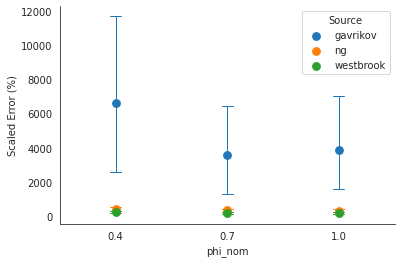

In [5]:
sns.pointplot(
    x="phi_nom",
    y="Scaled Error (%)", 
    hue="Source",
    data=df_plot[df_plot["Source"] != "measured"],
    errwidth=1, 
    capsize=0.1,
    join=False,
)
sns.despine()

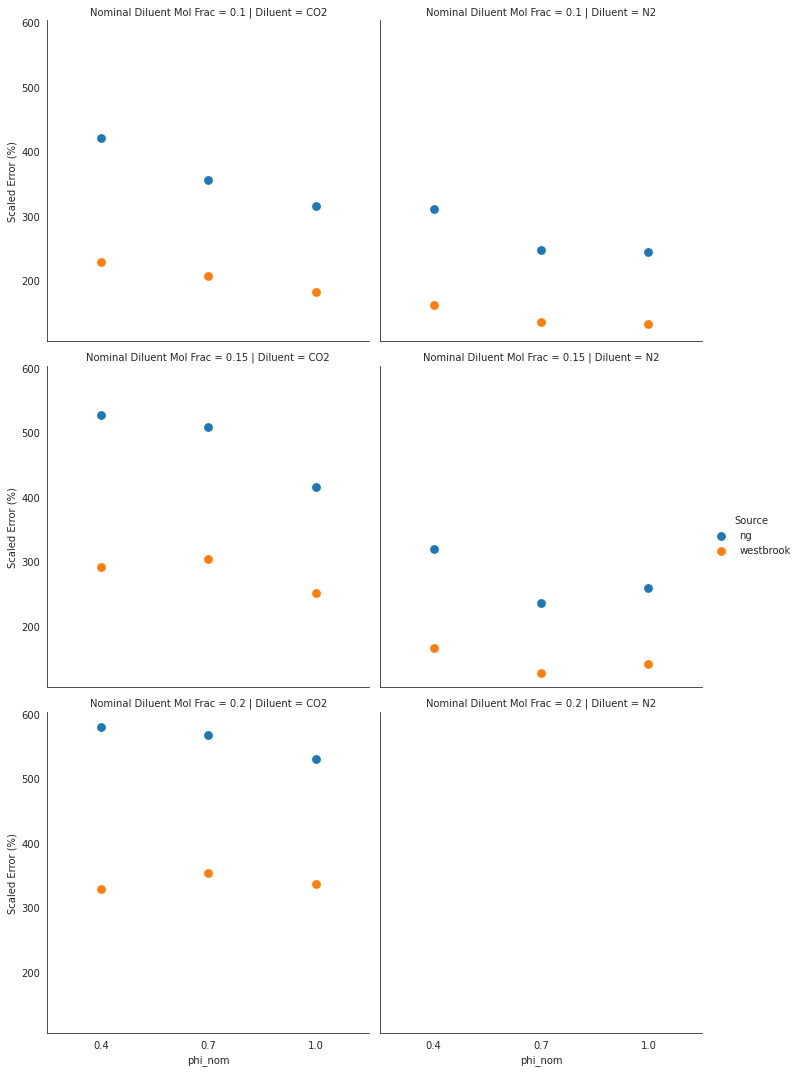

In [6]:
sns.catplot(
    x="phi_nom",
    y="Scaled Error (%)", 
    hue="Source",
    col="Diluent",
    row="Nominal Diluent Mol Frac",
    data=df_plot[
        ~df_plot["Source"].isin(["measured", "gavrikov"])
        # have to throw out N2 @ 0.2 because it's breaking the plot
        & ~((df_plot["Nominal Diluent Mol Frac"] == 0.2) & (df_plot["Diluent"] == "N2"))
    ],
    errwidth=1, 
    capsize=0.1,
    join=False,
    kind="point",
)
sns.despine()

In [7]:
gb = df_plot.groupby(["Nominal Diluent Mol Frac", "Diluent", "Source"])
gb["Scaled Error (%)"].std().dropna()

Nominal Diluent Mol Frac  Diluent  Source   
0.10                      CO2      gavrikov     1274.099173
                                   ng             53.395975
                                   westbrook      23.263626
                          N2       gavrikov      446.863278
                                   ng             37.552807
                                   westbrook      16.590037
0.15                      CO2      gavrikov     2172.312503
                                   ng             60.122742
                                   westbrook      27.913246
                          N2       gavrikov      656.638002
                                   ng             43.028172
                                   westbrook      19.469551
0.20                      CO2      gavrikov     2925.691253
                                   ng             25.842458
                                   westbrook      12.855884
                          N2       gavrikov      849.81

In [8]:
gb = df_plot.groupby("Source")
pd.DataFrame([gb["Scaled Error (%)"].mean().dropna(), gb["Scaled Error (%)"].std().dropna()], index=["mean", "std"])

Source,gavrikov,ng,westbrook
mean,4598.764965,374.002002,213.603882
std,4413.166269,125.364113,81.259701


In [9]:
from scipy.stats import linregress

In [10]:
df_plot.head()

,Diluent,phi_nom,Equivalence Ratio,Nominal Diluent Mol Frac,dil_mf,u_cell_size_measured,Source,cell_size,Scaled Cell Size,u_cell_size,u_cell_size_scaled,Scaled Error (%)
0,CO2,0.4,0.419182,0.10,0.103943,0.480062,measured,17.711596,0.202158,0.480062,0.017156,NaN
1,CO2,0.4,0.416662,0.15,0.154795,0.479481,measured,26.122865,0.445709,0.479481,0.017162,NaN
2,CO2,0.4,0.425508,0.20,0.207642,0.594380,measured,45.265852,1.000000,0.594380,0.000000,NaN
3,CO2,0.7,0.735369,0.10,0.104023,0.530100,measured,11.744907,0.029391,0.530100,0.019172,NaN
4,CO2,0.7,0.730354,0.15,0.154600,0.512883,measured,14.199823,0.100473,0.512883,0.018348,NaN


Scaled Cell Size
Correlation: westbrook
Slope: 0.862
Intercept: 0.048
R^2: 0.813

Correlation: ng
Slope: 0.901
Intercept: 0.045
R^2: 0.855

Correlation: gavrikov
Slope: 0.872
Intercept: 0.106
R^2: 0.803



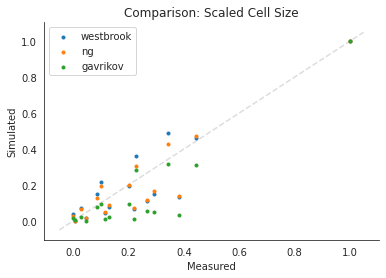





cell_size
Correlation: westbrook
Slope: 0.222
Intercept: 9.166
R^2: 0.813

Correlation: ng
Slope: 0.132
Intercept: 8.765
R^2: 0.855

Correlation: gavrikov
Slope: 0.004
Intercept: 13.903
R^2: 0.803



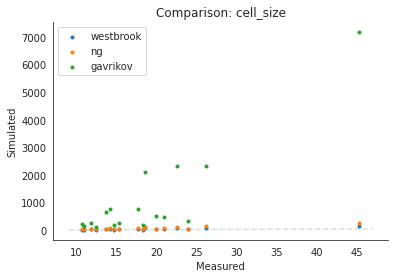

In [11]:
for cell_size_column in ["Scaled Cell Size", "cell_size"]:
    plt.figure()
    measured = df_plot[df_plot["Source"] == "measured"][cell_size_column]
    
    print(cell_size_column)
    print("=" * len(cell_size_column))
    for color_num, source in enumerate(["westbrook", "ng", "gavrikov"]):
        simulated = df_plot[df_plot["Source"] == source][cell_size_column]
        plt.scatter(
            x=measured,
            y=simulated,
            label=source,
            marker=".",
            color=f"C{color_num}",
        )
        regression = linregress(x=simulated, y=measured)

        print(f"Correlation: {source}")
        print(f"Slope: {regression.slope:.3f}")
        print(f"Intercept: {regression.intercept:.3f}")
        print(f"R^2: {regression.rvalue**2:.3f}")
        print()
    plt.legend()
    plt.plot(plt.xlim(), plt.xlim(), c="#dddddd", ls="--", zorder=-1)
    plt.title(f"Comparison: {cell_size_column}")
    plt.xlabel("Measured")
    plt.ylabel("Simulated")
    sns.despine()
    plt.show()

    print("\n\n\n")

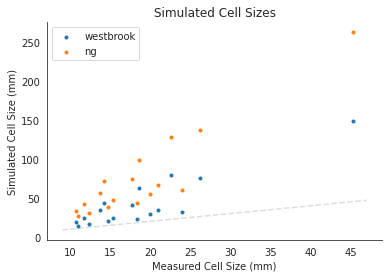

In [18]:
cell_size_column = "cell_size"
measured = df_plot[df_plot["Source"] == "measured"][cell_size_column].values
x = np.linspace(start=0, stop=30, num=10)
for color_num, source in enumerate(["westbrook", "ng"]):
    simulated = df_plot[df_plot["Source"] == source][cell_size_column]
    plt.scatter(
        measured,
        simulated,
        label=source,
        color=f"C{color_num}",
        marker=".",
    )

plt.legend()
plt.plot(plt.xlim(), plt.xlim(), c="#dddddd", ls="--", zorder=-1)
plt.title("Simulated Cell Sizes")
plt.xlabel("Measured Cell Size (mm)")
plt.ylabel("Simulated Cell Size (mm)")
sns.despine()
plt.show()

Correlation: westbrook
Slope: 0.222
Intercept: 9.166
R^2: 0.813

Correlation: ng
Slope: 0.132
Intercept: 8.765
R^2: 0.855

Correlation: gavrikov
Slope: 0.004
Intercept: 13.903
R^2: 0.803



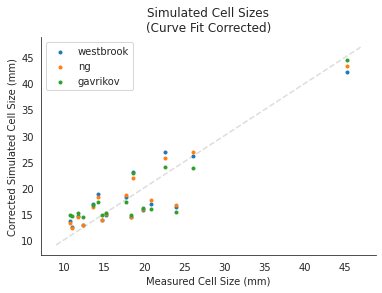

In [16]:
cell_size_column = "cell_size"
measured = df_plot[df_plot["Source"] == "measured"][cell_size_column].values
x = np.linspace(start=0, stop=30, num=10)
for color_num, source in enumerate(["westbrook", "ng", "gavrikov"]):
    simulated = df_plot[df_plot["Source"] == source][cell_size_column]
    regression = linregress(x=simulated, y=measured)
    plt.scatter(
        measured,
        (regression.slope * simulated + regression.intercept),
        label=source,
        color=f"C{color_num}",
        marker=".",
    )
    print(f"Correlation: {source}")
    print(f"Slope: {regression.slope:.3f}")
    print(f"Intercept: {regression.intercept:.3f}")
    print(f"R^2: {regression.rvalue**2:.3f}")
    print()

plt.legend()
plt.plot(plt.xlim(), plt.xlim(), c="#dddddd", ls="--", zorder=-1)
plt.title("Simulated Cell Sizes\n(Curve Fit Corrected)")
plt.xlabel("Measured Cell Size (mm)")
plt.ylabel("Corrected Simulated Cell Size (mm)")
sns.despine()
plt.show()

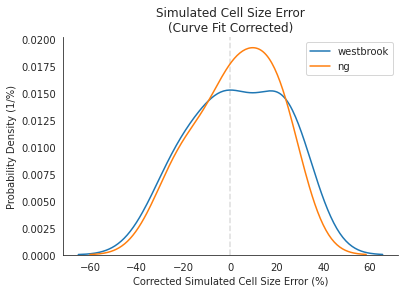

In [13]:
cell_size_column = "cell_size"
measured = df_plot[df_plot["Source"] == "measured"][cell_size_column].values
x = np.linspace(start=0, stop=30, num=10)
for color_num, source in enumerate(["westbrook", "ng"]):
    simulated = df_plot[df_plot["Source"] == source][cell_size_column].values
    regression = linregress(x=simulated, y=measured)
    sns.kdeplot(
        ((regression.slope * simulated + regression.intercept) - measured) / measured * 100,
        label=source,
        color=f"C{color_num}",
#         marker=".",
#         ls="None",
    )
plt.legend()
plt.axvline(0, c="#dddddd", ls="--", zorder=-1)
plt.title("Simulated Cell Size Error\n(Curve Fit Corrected)")
plt.xlabel("Corrected Simulated Cell Size Error (%)")
plt.ylabel("Probability Density (1/%)")
sns.despine()
plt.show()